# Text Preprocessing on VDCNN Architecture

#### Soheer Choudhry, Fatemeh Tahrirchi

####  soheer.choudhry@ryerson.ca, fatemeh.tahrirchi@ryerson.ca

# Introduction:

#### Problem Description:

NLP tasks are typically accomplished using recurrent neural networks and convolutional networks that tend to be shallow implementations with processing granularity that can range from individual characters, to words or even whole sentences, in order to most effectively analyze and extract relevant information.  The key objective of this study is to evaluate network architectures with very large depths and using small temporal convolution filters with different types of pooling against shallow architectures.  The expectation is that very deep convolutional network architectures may yield better performance than their shallow counterparts.

#### Context of the Problem:
The key determining factor for employing the use of very deep concolutional neural networks (VDCNN) was the success that this type of architecture has in the field of computer vision because of the compositional structure of an image.  It has been posited that texts have similar heirarchical properties (given that characters combine to form n-grams, words, sentences and so on) and therefore the solution may be tranferable across domains (Conneau et. al., 2017).  Therefore, developing a neural network with a deep architecture should yield more favorable results over traditional, shallow architecture implementations.
The objective of the research paper that serves as a basis for this study (Conneau et. al., 2017) is to evaluate network architectures with large depths and using small temporal convolution filters with different types of pooling against shallow architectures with the expectation that very deep convolutional network architectures may yield better performance than their shallow counterparts.


#### Limitation About other Approaches:

Other resarch studies in the text processing domain has used a variety of interesting methods, for example implementing shallow neural nets (with multiple widths and filters) and followed by a max pooling layer or another approach that was similar but with the key differentiator being a temporal k-mak pooling layer in order to detect the k-most important features of a sentence while preserving the order of the sentence.  Several studies approached sentiment analysis performed entirely at the character level for example by combining character-level embeddings of a word and then jointly using used with word embeddings.  Another implementation was also studies where a convolutional network with up to five layers is used and then is further processed by an LSTM, which yielded impressive results.  The issue at hand that each study has proposed is to innovate a novel architecture for text processing that yields superior results as compared to past innovations.  

#### Solution:
In order to implement a novel solution architecture to a familiar problem is to look to not only past innovations but also to other domains where that may have transferable similarities to this problem space.  Conneau, et. al. (2017) have presented an interesting and effective solution to the text processing space based on an architecture that is typically used in computer vision applications.  However, while the paper discusses the implementation at length, decided to study this implementation and determine whether combining specific data preprocessing steps will further contribute to effectiveness of this architecture. 


# Background

Explain the related work using the following table

| Reference |Explanation |Dataset/Input |Weakness
| --- | --- | --- | --- |
|Sennrich et al., 2016. [1] |This paper discussed a new approach to the translation of out-of-vocabulary words with the use of a simpler and more effective approach by encoding rare and unknown words as sequences of sub-word units.  This approach is based on the idea that word classes are translatable through smaller units than words.  The suitability of different word techniques are discussed (e.g. n-gram models) to show that subword models are an improvement over traditional (back-off dictionary) approaches.| WMT2015 Dataset (English->German, English->Russian) |Poor translation results if vocabulary size of subword models is too large
|Moriya, Sh et al. 2018. [2] |The effective of  using transfer learning between datasets that have a certain degree of similarity. The key motivation for this approach was given the challenge of finding the volume of labeled data necessary in order to train CNNs.  Given that this approach has been successful for image recognition tasks, expectation is for promising results in the text processing domain.  Experimental results revealed that the full transfer method (vs. non-transer and partial transfer) is the most effective method.|AFPBB|Weakness in this study is the limitation of datasets that were used for testing purposes.
|Conneau, A et al. 2017. [3] | Implementation of a very deep convolutional neural network, which is the first implementation of a deep architecture of this kind.  The motivation for this approach was primarily from the image processing domain.  Other architectural features were adopted from related research studies that yielded positive results (e.g. k-max pooling, character-level embedding).| AG news, Sogou news, DBPedia, Yelp Reviews, Amazon review, Yahoo! Answers | The research study did not use any preprocessing (except lowercasing) 

# Methodology

The proposed architecture is developed based on studies of related works, which includes the use of fixed size representations of words or characters into a low-dimensional space; the use of recursive and convolutional neural networks; and, the use of multiple temporal k-max pooling layers.
The approach is to generate a 2D tensor that contains embeddings of the characters fixed to 1024.  Subsequently, a layer of 64 convolutions of size 3 is applied, which are then followed by temporal convolutional blocks.  There are 3 pooling operations, which half the temporal resolution that results in feature maps of 128, 258 and 512 feature maps.  
For the classification, the temporal resolution of the output of the convolution blocks is first down-sampled to a fixed dimension using k-max pooling in order to extract the k most important features independent of where they appear in the sentence.  The resulting features are transformed into a single vector, which is input to a three-layer, fully connected classifier with ReLU hidden units and softmax outputs.  For all of the experiments, k is set to 8 and the number of hidden units to 2048.
Each convolution block is a sequence of two convolution layers with each one followed by a temporal BatchNorm layer and a ReLU activation.  The kernel size of all temporal convolutions is 3.  Between blocks, three types of down-sampling are tested, all of which reduce the temporal resolution by a factor of 2.  Refer to Figures 1 and 2 for a pictoral description of the architecture.

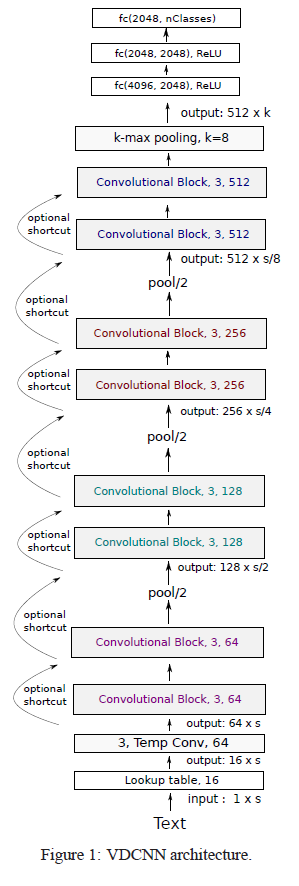

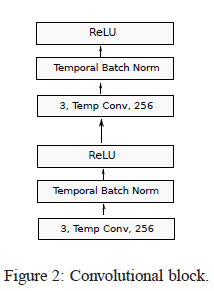

This paper explored four convolutional depths:  9, 17, 29, 49 (determined by summing the number of blocks with 64, 128, 256 and 512 filters, with each block containing two convolutional layers).  The observed outcomes is that the very deep network architectures performs better than the more shallower architectures.  In addition, those datasets with much more training samples (i.e. 3 million) markedly increased performance.  When the depth was increased from 9 to 49 layers, performance began dropping.  Although when using ‘shortcut’ connections in order to solve for the vanishing gradient issue, slightly improved results were observed across all depths.

A number of datasets were tested that ranged from 120K to 3.6M instances and with classes between 2 to 14.  Notable conclusions were as follows:
(1)	Depth improves performance – as the network depth increased, the test errors decreased on all data sets (e.g. going from depth 9 to 29 reduced the error rate by 1% when using the Amazon dataset – 3 million samples)
(2)	Going too deep degrades performance – gain in performance due to depth is limited; when the depth increases too much the accuracy of the model gets ‘saturated’ and starts to degrade rapidly, primarily due the challenge of optimizing a very deep model and also due to the gradient vanishing problem.  However, this limitation can be overcome by ‘shortcut’ connections between convolutional blocks that allow the gradients to flow more easily in the network.

Our proposal is to replicate this implementation and to determine if whether a focus on data preprocessing will provide additional incremental improvements to overall accuracy.  Our approach is to use the Yelp data (same as one of the datasets used in the original research study) and to evaluate data to determine it's effectiveness on sentiment analysis (i.e. polarity) and classification (5 classes in total).  While the original study used roughly 600k data samples, given resource limitations this study using roughly 60k but baselining the original implementation and basing incremental improvements on that baseline.  (Note that the original paper reports results of 94% for polarity and 62.7% for the classification exercise on this dataset). Preprocessing is mainly focused on the traditional data text normalizing steps (i.e. lowercasing, stemming, lemmatizing, etc.) but also incorporating other aspects such as focusing on specific parts-of-speech tags while filtering out others or adding additional features using positive and negative word banks.  The results of additional preprocessing steps resulted in the incremental benefits, as below:

![Table2.png](attachment:https://github.com/FatimaTahrirchi/NLP_Project_DS8008/blob/main/Images/Table2.png)

As indicated, given resource limitations, the first result in Table 1 serves as our baseline to determine whether any incremental improvements have been made.  Additional two use cases focuses on specific preprocessing techniques, which resulted in roughly 4-5% accuracy gains for both the sentiment / polarity exercise and for the 5-class classification problem, which is quite significant in the text processing domain.

# Implementation

In [2]:
class CharVectorizer():
    def __init__(self, maxlen=1024, padding='pre', truncating='pre', alphabet="""abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:’"/|$%ˆ&*˜‘+=<>()[]{}#@"""):
        
        self.alphabet = alphabet # valid alpabet or charactars
        self.maxlen = maxlen
        self.padding = padding
        self.truncating = truncating

        self.char_dict = {'_pad_': 0, '_unk_': 1, ' ': 0} 
        for i, k in enumerate(self.alphabet, start=2):
            self.char_dict[k] = i

    def transform(self,sentences):
        """
        sentences: list of string
        list of review, review is a list of sequences, sequences is a list of int
        """
        sequences = []

        for sentence in sentences:
            seq = [self.char_dict.get(char, self.char_dict["_unk_"]) for char in sentence]
            
            if self.maxlen:
                length = len(seq)

                if length > self.maxlen:# we need to crop the sequence

                    if self.truncating == 'pre':# we crope from the end of the sequence
                        seq = seq[-self.maxlen:]
                    elif self.truncating == 'post':# we crop the beggining of the sequence
                        seq = seq[:self.maxlen]

                if length < self.maxlen:# we need to pad the sequence

                    diff = np.abs(length - self.maxlen)
                    if self.padding == 'pre':#We pad in the beggining
                        seq = [self.char_dict['_pad_']] * diff + seq
                    elif self.padding == 'post':#We pad at the end
                        seq = seq + [self.char_dict['_pad_']] * diff

            sequences.append(seq)                

        return sequences        
    
    def get_params(self):
        params = vars(self)
        return params

# Text Preprocessing

In [4]:
class Preprocessing():


    def __init__(self,Preprocess_Type='lower'):
        self.Preprocess_Type = Preprocess_Type
        self.stop_list = set(nltk.corpus.stopwords.words('english')+["#","@"])#english stop words
        self.temp_tag  = ['PRP','VBZ','CC','POS','IN','DT','TO','PRP$']#noise words
        self.stemmer   = nltk.stem.PorterStemmer()
        self.word_tokenize  = nltk.tokenize.word_tokenize
        self.pos_tag   = nltk.pos_tag
        self.punctuation = list(string.punctuation)
        self.neg_words = ["n't", "not", "no", "never"]#used in Add_Not preprocessing

    def transform(self, sentences):
        """
        sentences: list(str) 
        output: list(str)
        """
        if self.Preprocess_Type=='lower':
          return [s.lower() for s in sentences]
        elif self.Preprocess_Type=='denoiser':
          return [self.denoiser(s) for s in sentences]
        elif self.Preprocess_Type=='add_pos':
          return [self.add_pos(s) for s in sentences]
        elif self.Preprocess_Type=='add_hashtag':
          return [self.add_hashtag(s) for s in sentences]
        elif self.Preprocess_Type== 'add_NOT':
          return [self.add_Not(s) for s in sentences]


    def denoiser(self,text):
        new_text=""
        words=self.word_tokenize(text)
        words=nltk.pos_tag(words)
        words=[word.lower() for word,tag in words if tag not in self.temp_tag]#remove some extra words depends on their pos_tag
        words=[self.stemmer.stem(word) for word in words if word not in self.stop_list]#remove stop words and stemming
        for word in words:
            new_text=new_text+word+" "
        new_text=new_text[:-1]
        return new_text

    def add_pos(self,text):
        new_text=""
        words=self.word_tokenize(text)
        words=nltk.pos_tag(words)
        #concate pos_tag to the end of words,remove some extra words depends on their pos_tag,remove stop words and stemming
        words=[(self.stemmer.stem(word)+'@'+tag).lower() for word,tag in words if ((tag not in self.temp_tag) and (word.lower() not in self.stop_list))]
        for word in words:
            new_text=new_text+word+" "
        new_text=new_text[:-1]
        return new_text

    def add_hashtag(self,text):
        hashtaged = lambda word : '#'+word
        new_text=""
        words=self.word_tokenize(text)
        words=nltk.pos_tag(words)
        words2=[]
        hashtag=False
        for word,tag in words:
            if word=='#': 
                hashtag=True # if a previous token is '#' next token concated with '#' 
            if ((tag not in self.temp_tag) and (word not in self.stop_list)) or (word!='#' and hashtag==True):#remove some extra words depends on their pos_tag,remove stop words 
                if word[0].isupper():
                    hashtag=True # if a word is captalize will concate with '#'
                new_word=self.stemmer.stem(word).lower()# stemming
                if hashtag==False:
                    words2.append(new_word)
                if hashtag:
                    words2.append(hashtaged(new_word))
                    hashtag=False


        words=words2
        for word in words:
            new_text=new_text+word+" "
        new_text=new_text[:-1]
        return new_text

    def add_Not(self,text):
        new_text=""
        words= self.word_tokenize(text)
        words=self.pos_tag(words)
        words=[word.lower() for word,tag in words if tag not in self.temp_tag]#remove some extra words depends on their pos_tag 
        words=[self.stemmer.stem(word) for word in words ] 
        flag = 0  # start with the flag in the off position
        not_stem=[]
        for word in words:
            # if flag is on then append word with "NOT_"
            if flag == 1:
                # check if the word is a punctuation (this is where we need to stop if flag==1)
                if word in  self.punctuation:
                    # don't append anything to a punctuation
                    # if we reached here then it means the flag is to be turned off
                    not_stem.append(word)
                elif(word not in  self.neg_words):
                    not_stem.append("not_"+word)
                    
            # otherwise add the word without making any changes
            else:
                not_stem.append(word)
            
            # if the word is a negative word then turn on the flag
            if word in  self.neg_words:
                flag=1
            # if word is a punctuation then word off the flag
            if word in  self.punctuation:
                flag=0
                
        for word in not_stem:
            new_text=new_text+word+" "
        new_text=new_text[:-1]
        return new_text





# VDCNN

In [3]:
class BasicConvResBlock(nn.Module):

    def __init__(self, input_dim=128, n_filters=256, kernel_size=3, padding=1, stride=1, shortcut=False, downsample=None):
        super(BasicConvResBlock, self).__init__()

        self.downsample = downsample
        self.shortcut = shortcut

        self.conv1 = nn.Conv1d(input_dim, n_filters, kernel_size=kernel_size, padding=padding, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_filters)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(n_filters, n_filters, kernel_size=kernel_size, padding=padding, stride=stride)
        self.bn2 = nn.BatchNorm1d(n_filters)

    def forward(self, x):

        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.shortcut:
            if self.downsample is not None:
                residual = self.downsample(x)
            out += residual

        out = self.relu(out)

        return out


class VDCNN(nn.Module):

    def __init__(self, n_classes=2, num_embedding=141, embedding_dim=16, depth=9, n_fc_neurons=2048, shortcut=False):
        super(VDCNN, self).__init__()

        layers = []
        fc_layers = []
        self.embed = nn.Embedding(num_embedding,embedding_dim, padding_idx=0, max_norm=None, norm_type=2, scale_grad_by_freq=False, sparse=False)
        layers.append(nn.Conv1d(embedding_dim, 64, kernel_size=3, padding=1))

        if depth == 9:
            n_conv_block_64, n_conv_block_128, n_conv_block_256, n_conv_block_512 = 1, 1, 1, 1
        elif depth == 17:
            n_conv_block_64, n_conv_block_128, n_conv_block_256, n_conv_block_512 = 2, 2, 2, 2
        elif depth == 29:
            n_conv_block_64, n_conv_block_128, n_conv_block_256, n_conv_block_512 = 5, 5, 2, 2
        elif depth == 49:
            n_conv_block_64, n_conv_block_128, n_conv_block_256, n_conv_block_512 = 8, 8, 5, 3

        layers.append(BasicConvResBlock(input_dim=64, n_filters=64, kernel_size=3, padding=1, shortcut=shortcut))
        for _ in range(n_conv_block_64-1):
            layers.append(BasicConvResBlock(input_dim=64, n_filters=64, kernel_size=3, padding=1, shortcut=shortcut))  
        layers.append(nn.MaxPool1d(kernel_size=3, stride=2, padding=1)) # l = initial length / 2

        ds = nn.Sequential(nn.Conv1d(64, 128, kernel_size=1, stride=1, bias=False), nn.BatchNorm1d(128))
        layers.append(BasicConvResBlock(input_dim=64, n_filters=128, kernel_size=3, padding=1, shortcut=shortcut, downsample=ds))
        for _ in range(n_conv_block_128-1):
            layers.append(BasicConvResBlock(input_dim=128, n_filters=128, kernel_size=3, padding=1, shortcut=shortcut))
        layers.append(nn.MaxPool1d(kernel_size=3, stride=2, padding=1)) # l = initial length / 4

        ds = nn.Sequential(nn.Conv1d(128, 256, kernel_size=1, stride=1, bias=False), nn.BatchNorm1d(256))
        layers.append(BasicConvResBlock(input_dim=128, n_filters=256, kernel_size=3, padding=1, shortcut=shortcut, downsample=ds))
        for _ in range(n_conv_block_256 - 1):
            layers.append(BasicConvResBlock(input_dim=256, n_filters=256, kernel_size=3, padding=1, shortcut=shortcut))
        layers.append(nn.MaxPool1d(kernel_size=3, stride=2, padding=1))

        ds = nn.Sequential(nn.Conv1d(256, 512, kernel_size=1, stride=1, bias=False), nn.BatchNorm1d(512))
        layers.append(BasicConvResBlock(input_dim=256, n_filters=512, kernel_size=3, padding=1, shortcut=shortcut, downsample=ds))
        for _ in range(n_conv_block_512 - 1):
            layers.append(BasicConvResBlock(input_dim=512, n_filters=512, kernel_size=3, padding=1, shortcut=shortcut))

        layers.append(nn.AdaptiveMaxPool1d(8))
        fc_layers.extend([nn.Linear(8*512, n_fc_neurons), nn.ReLU()])
        # layers.append(nn.MaxPool1d(kernel_size=8, stride=2, padding=0))
        # fc_layers.extend([nn.Linear(61*512, n_fc_neurons), nn.ReLU()])

        fc_layers.extend([nn.Linear(n_fc_neurons, n_fc_neurons), nn.ReLU()])
        fc_layers.extend([nn.Linear(n_fc_neurons, n_classes)])

        self.layers = nn.Sequential(*layers)
        self.fc_layers = nn.Sequential(*fc_layers)

        self.__init_weights()

    def __init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_in')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):# 128x1024x69 (b X s X f0)

        out = self.embed(x)         # 128x1024x16
        out = out.transpose(1, 2)   #128x1024x16-->128x16x1024

        out = self.layers(out)       #covelutional layers (feature extraction)

        out = out.view(out.size(0), -1)   #flatten (After training this output can be used for any ML method)

        out = self.fc_layers(out)     #fully connected layers(prediction layer)

        return out


# Conclusion and Future Direction

The results of additional preprocessing were promising as the Table 1 illustrates and even at that with using traditional approaches with low complexity.  A notable outcome of this study is that while the solution architecture has been the central focus of innovating improvements in the text processing space.  Additional focus on determining whether additional, possibly more complex, preprocessing techniques may be well-placed when paired with effective solution architectures in order to further enhance performance by yielding additional, incremental benefit in performance. 


# References:

[1]:  Sennrich, R., Haddow, B. and Alexandra Birch. 2016. Neural machine translation of rare words with subword units. pages 1715–1725.

[2]:  Moriya, Shun, Shibata, Chihiro. 2018. Transfer Learning Method for Very Deep CNN for Text Classification and Methods for its Evaluation. pages 1715–1725.

[3]:  Conneau, A., Schwenk, H., Cun, Y. L., & Barrault, L. (2017, April). Very deep convolutional networks for text classification. In Proceedings of the 15th Conference of the European Chapter of the Association for Computational Linguistics: Volume 1, Long Papers (pp. 1107-1116). Association for Computational Linguistics.

